# **Lab Machine Learning Ranking Assignment**
![](https://www.upm.es/gsfs/SFS11831)

**Curso**: Biomedical Informatics

**Section**: Machine Learning Ranking as *Real World Data - Secondary Use of Clinical Data* by **Prof. David Pérez del Rey**

**Name**: Carlos Utrilla Guerrero

**Date**: Dec 2, 2024

**Email**: [c.utrilla.guerrero@gmail.com]()

--


## 0. **Introduction**

![](https://www.regenstrief.org/wp-content/uploads/2022/10/LOINC_SNOMED_web.jpg)

In the medical domain, standardizing lab test codes is crucial for interoperability between healthcare systems. LOINC (Logical Observation Identifiers Names and Codes) provides a universal standard for identifying medical laboratory tests. The challenge lies in accurately mapping real-world test names (e.g., "Glucose in Blood") to their corresponding LOINC codes (e.g., `74774-1`).




### **Key Objectives**
1. **Automate Mapping**: Reduce manual effort and errors in mapping test names to LOINC codes.
2. **Increase Accuracy**: Ensure precise matching by considering attributes like `component`, `system`, and `property`.
3. **Scalability**: Handle a growing dataset of lab tests and LOINC codes.

<img src="https://media.licdn.com/dms/image/D4E12AQHyC3_TJJTO0Q/article-cover_image-shrink_600_2000/0/1692622801357?e=2147483647&v=beta&t=coKgL_sBXcxNhoZ-Db2o7NB6gFr_ujaWM7rN0u7hoOU" alt="image.png" style="float: left; width: 400px;">

### **Inside Search Engine**
<img src="https://opensourceconnections.com/wp-content/uploads/2020/05/an_index-2.png" alt="Indexing" style="width: 45%; float: left; margin-right: 10px;">
<img src="https://opensourceconnections.com/wp-content/uploads/2020/05/a_query-2.png" alt="Querying" style="width: 45%; float: right; margin-left: 10px;">
<img src="https://opensourceconnections.com/wp-content/uploads/2020/05/query_with_model-2.png" alt="Query with Model" style="width: 45%; float: left; margin-right: 10px; margin-top: 10px;">
<p style="clear: both;"></p>
<p>Source: <a href="https://opensourceconnections.com/blog/2017/02/24/what-is-learning-to-rank/">OpenSource Connections</a></p>

<p style="float: left; width: 60%;">
Supervised and Semi-supervised LTR methods require the following data:
</p>
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*Epgb2mnHqasyudi77b-Crw.png" alt="Model" style="width: 35%; float: right; margin-left: 10px; margin-top: 10px;">




- Queries, denoted by q
- Result from existing search ranking function a.k.a. Results you want to re-rerank, also referred to as ‘document’ in web search context. Let's refer to this as: d
- Labels for query-result pair (relevant/not relevant).
- In real-world settings, such data can be obtained from search logs. We will refer to the label as y.


<p style="float: left; width: 60%;">
> Machines can automatically learn to Rank, training the ranking model
</p>
<img src="https://opensourceconnections.com/wp-content/uploads/2020/05/a_model-2.png" alt="Model" style="width: 45%; float: right; margin-left: 10px; margin-top: 10px;">


## 1. **Choose a type of MLR approach:** 

**The Pointwise Approach -- Staged Logistic Regression**
> Estimate the probability of a document to be useful to the user for a given query using a logistic regression model (Gey, F.C. (1994))

<p style="float: left; width: 20%;">
</p>
<img src="https://media.springernature.com/w316/springer-static/cover-hires/book/978-1-4471-2099-5?as=webp" alt="Model" style="width: 25%; float: right; margin-left: 10px; margin-top: 10px;">
<!-- https://dl.acm.org/cms/10.5555/188490.188560/asset/f48c9f47-50be-481e-81c7-ac8d59722cae/assets/188490.188560.fp.png -->

## 2. **How Pointwise Approach -- Staged Logitic Regression works**

### **2.1. Explain in a nuthsell**

The **Pointwise Approach** is a supervised learning framework that treats the mapping task as a classification problem: predict labels by using classification or regression loss.

 Each candidate LOINC code for a test query is evaluated independently for relevance, with the goal of assigning a binary label (`1` for relevant, `0` for irrelevant).

<!-- <img src="https://miro.medium.com/v2/resize:fit:700/format:webp/1*Mq1xfd-Qqer3Zxr2yK9fIg.png" alt="Pointwise Approach" style="width: 50%; display: block; margin-left: auto; margin-right: auto;">

<p style="text-align: center;">Source: <a href="https://medium.com/@mayurbhangale/pointwise-pairwise-and-listwise-learning-to-rank-baf0ad76203e">Medium</a></p>

This formula calculates the average squared error between the predicted values and the true labels across all instances. The model tries to minimize this loss, meaning it aims to make its predictions as close as possible to the actual values for each data point. The loss function evaluates how well the model performs for each independent query, focusing on improving its predictions by iterating through multiple stages of learning. -->





 Here’s how it works:

Logistic Regression predicts the probability of a binary outcome (relevant or not relevant) for each input. 

The probability $$P(y = 1 \mid \mathbf{x})$$ is modeled using the sigmoid function:

$$
P(y = 1 \mid \mathbf{x}) = \frac{1}{1 + e^{-(\mathbf{w} \cdot \mathbf{x})}}
$$

<!-- - `\mathbf{x}`: Feature vector representing the test-LOINC pair (e.g., keywords match, system match, units match).
- `\mathbf{w}`: Weight vector learned during training.
- `y`: Binary label (`1 = \text{relevant}, 0 = \text{not relevant}`). -->

Where:

$$
\begin{aligned}
\mathbf{x} &: \text{Feature vector representing the test-LOINC pair (e.g., keywords match, system match, units match).} \\
\mathbf{w} &: \text{Weight vector learned during training.} \\
y &: \text{Binary label (}1 = \text{relevant}, 0 = \text{not relevant}\text{).}
\end{aligned}
$$



The model is trained to minimize the log loss function, which measures the difference between predicted probabilities and actual labels:

$$
\text{Log Loss} = - \frac{1}{N} \sum_{i=1}^N \left[ y_i \log P(y_i) + (1 - y_i) \log (1 - P(y_i)) \right]
$$

where:

$$
y_i \text{ is the true binary label (1 for relevant, 0 for not relevant).}
$$

$$
P(y_i) \text{ is the predicted probability of relevance.}
$$

---

<!-- A feature vector is a numerical representation:

$$
\mathbf{x} = [x_1, x_2, \dots, x_n]
$$

Where:

$$
x_1, x_2, \dots, x_n: \text{Individual features (e.g., keyword match, specimen type, units match, etc.)}.
$$

$$
n: \text{Total number of features}.
$$

The feature vector serves as the foundation for the model to compute probabilities, rankings, or classifications.

--- -->

<!-- 


2. **Logistic Regression Model**:
   The probability that a candidate LOINC code \( y \) is relevant to query \( q \) is computed using logistic regression:

   $$
   P(y=1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_nX_n)}}
   $$

   Where:
   - \( X \): Input features for the candidate LOINC code.
   - \( \beta_i \): Coefficients learned during training.

3. **Staging Mechanism**:
   - **Stage 1**: Focus on high-level textual similarity (e.g., query-component overlap).
   - **Stage 2**: Incorporate domain-specific features (e.g., system-property relevance).
   - **Stage 3**: Refine with contextual or metadata-based features.

Each stage applies logistic regression iteratively, filtering out irrelevant candidates and improving precision. -->


### **2.3. How the Pointwise Model handle the Data**

The Pointwise model handle the dataset as independent query-candidate pairs:

Staged Logistic Regression is a refinement of traditional logistic regression, designed to improve performance by iteratively focusing on difficult-to-classify cases.

#### **Input**
- Each test-LOINC pair is treated as an independent instance. For the lab test "glucose in blood," the feature vector might include:

   - **Keyword Match**: Does the test name include "glucose"? (\(1\) if yes, \(0\) if no).
   - **Specimen Match**: Is the test for "blood"? (\(1\) if yes, \(0\) if no).
   - **Units Match**: Are the test units (e.g., mg/dL) compatible with the LOINC code? (\(1\) if yes, \(0\) if no).
   - **Panel Match**: Does this test appear in a standard panel for glucose testing? (\(1\) if yes, \(0\) if no).

   If the test matches all these features, the vector might look like:  

   $$
   \mathbf{x} = [1, 1, 1, 1]
   $$

   If it only matches keywords and units, it could look like:  

   $$
   \mathbf{x} = [1, 0, 1, 0]
   $$


<p style="text-align: center;">
   <img src="https://www.degruyter.com/document/doi/10.1515/labmed-2019-0193/asset/graphic/j_labmed-2019-0193_fig_003.jpg" alt="each clinical observation or medical examination is thus represented by seven elements: the preceding LOINC code and the formal name consisting of the six axes described above" style="width: 50%;">
</p>


<!-- **Example Features for "glucose in blood":**
- Presence of keywords: "glucose," "blood," "plasma."
- Document type: Lab report, clinical note.
- Specificity: Mentions of specific tests or conditions. -->



#### **Training**
The model is trained using labeled data:
- **Positive examples (1):** Test-LOINC pairs relevant to neonatal bacterial meningitis.
- **Negative examples (0):** Test-LOINC pairs unrelated to the context.

The model predicts the probability of a document being relevant:

$$
P(\text{relevant} \mid \text{features}) = \frac{1}{1 + e^{-(\mathbf{w} \cdot \mathbf{x})}}
$$

Where:

$$
\mathbf{x}: \text{Feature vector for the document-query pair.}
$$

$$
\mathbf{w}: \text{Model weights learned during training.}
$$


Training is conducted in stages, iteratively adjusting the weights to improve predictions for misclassified examples.

#### **Feature Engineering**
Extract features from the dataset, such as:
- Match of component and system (e.g., "glucose" and "CSF").
- Unit consistency (e.g., mg/dL vs. mmol/L).
- Semantic similarity between test descriptions.

#### **Inference**:
   - For a new query, the model evaluates all candidate LOINC codes independently.
   - Candidates with the highest relevance probabilities are selected.
<!-- For a new test, the model evaluates all possible LOINC codes independently, ranks them by relevance probability, and selects the best match. -->
<!-- This approach ensures simplicity, scalability, and interpretable outputs but requires robust feature engineering for nuanced cases. -->
<!-- #### **Summary**
- Train a logistic regression model on the labeled dataset.
- Staged refinement adjusts weights iteratively to improve performance on difficult examples. -->






### 2.4. Benefits of the Pointwise Approach

#### **Simplicity**
- Treats each test-LOINC pair as an independent instance, simplifying the ranking problem.
- Suitable for datasets with binary relevance labels, like healthcare data.

#### **Interpretability**
- Logistic regression provides clear probabilities, aiding validation by clinicians.

#### **Scalability**
- Efficient for large datasets, as it does not require pairwise or listwise comparisons.

#### **Alignment with Data**
- Works well with structured datasets like LOINC, where binary relevance annotations are common.

---



### 2.5. Disadvantages of the Pointwise Approach

#### **Context Ignorance**
- The model does not consider relationships between test-LOINC pairs (e.g., relative rankings or comparisons).
- Lacks the ability to optimize for list-level metrics like NDCG.

#### **Suboptimal for Complex Scenarios**
- May struggle with nuanced distinctions between test-LOINC pairs without sufficient feature engineering.

#### **Potential Label Bias**
- Relies heavily on accurate binary labels; incorrect annotations can reduce performance.


**Comparison to Other Multi-Label Regression (MLR) Algorithms**

![](https://cdn.prod.website-files.com/6696d42284cfe85e5e20165b/66f3c9bc4a8acbae237a60ee_Pointwise.png)

| **Aspect**            | **Pointwise**                          | **Pairwise**                       | **Listwise**                           |
|-----------------------|----------------------------------------|------------------------------------|----------------------------------------|
| **Data**              | Treats each test-LOINC pair independently. | Compares relevance between pairs of tests. | Optimizes the ranking of an entire list of tests. |
| **Complexity**        | Low complexity; efficient for large datasets. | Higher complexity due to pair generation. | Most complex; requires fully ranked lists. |
| **Annotations**       | Binary relevance labels (0/1).         | Relative relevance (e.g., Test A > Test B). | Fully ordered relevance lists.         |
| **Strength**          | Simple, interpretable, and fast.       | Captures relative relevance effectively. | Directly optimizes ranking metrics.    |
| **Weakness**          | Ignores inter-instance relationships.  | Computationally expensive.         | Requires comprehensive and difficult annotations. |

---

### **2.6. Conclusion**

The **Pointwise Approach: Staged Logistic Regression** is an effective method for mapping real-world lab tests to LOINC codes, particularly in scenarios where interpretability and computational efficiency are critical. By leveraging staging, it incrementally refines predictions, making it suitable for medical applications that demand high precision.

For more complex datasets or when non-linear patterns are prevalent, alternative models like Random Forests or neural networks might be considered. However, the simplicity and scalability of the Pointwise approach often make it a preferred choice for this use case.

## 3. (Independent subtask) Map a set of Real-world lab tests to LOINC

### 3.1. Introduction to the Problem: Dataset building for diagnosis neonatal bacterial meningitis

<p style="text-align: center;">
    <img src="https://www.mdpi.com/microorganisms/microorganisms-09-00535/article_deploy/html/images/microorganisms-09-00535-g001-550.jpg" alt="Neonatal bacterial meningitis">
</p>

In bioinformatics and medical data retrieval, ranking relevant documents for queries such as "glucose in cerebrospinal fluid (CSF)" is essential for efficient information access. This problem involves:
- Retrieving documents with high relevance to the query.
- Ranking these documents effectively to prioritize the most useful ones.

Neonatal bacterial meningitis is a life-threatening condition that requires precise and timely diagnosis. Laboratory tests, such as cerebrospinal fluid (CSF) glucose and protein measurements, are crucial for identifying bacterial meningitis. Mapping these tests to LOINC codes ensures standardization and improves the interoperability of healthcare systems. Below are the few scenarios in neonatology:

1. **CSF Glucose Analysis**
* LOINC 2342-4: [https://loinc.org/2342-4/](https://loinc.org/2342-4/)
* Name: Glucose [Mass/volume] in CSF (mg/dL).
* Clinical Use: Measures CSF glucose concentration to diagnose meningitis or other infections. Abnormal glucose levels in CSF can indicate bacterial meningitis, often relevant in neonates.
* Neurological Context: Aids in differential diagnosis when paired with protein levels (e.g., protein-glucose ratio).

2. **CSF Protein Analysis**
* LOINC 2880-3: [https://loinc.org/2880-3](https://loinc.org/2880-3)
* Name: Protein [Mass/volume] in CSF (mg/dL).
* Clinical Use: Elevated CSF protein levels are associated with infections, inflammation, or intracranial hemorrhage.
* Neurological Context: Helps diagnose neonatal meningitis or traumatic brain injury.

3. **Combined panels**

* LOINC 34546-2: [https://loinc.org/34546-2](https://loinc.org/34546-2)
* Name: Protein and Glucose panel [Mass/volume] in CSF.
* Clinical Use: Enables simultaneous assessment of CSF glucose and protein levels.
* Neurological Context: Facilitates quick diagnosis in acute situations like suspected meningitis or metabolic disorders.



**Contextualize the Units of concentration**
Units such as `mg/dL` or `mmol/L` are commonly used for glucose. For instance:
- `mg`: Milligram, which is one-thousandth of a gram (0.001 grams).
- `dL`: Deciliter, which is one-tenth of a liter (0.1 liters).

So, `mg/dL` is a unit of concentration that expresses the amount of a substance (in milligrams) in a given volume of liquid (in deciliters). It is commonly for measuring the concentration of substances like glucose, cholesterol, or other metabolites in blood or other bodily fluids. For example, a glucose concentration of 100 mg/dL means that there are 100 milligrams of glucose in one deciliter of blood.

For the sake of simplicity, only the focus for this assignment is on `mg/dL`.

<!-- **mmol/L** stands for **millimoles per liter**. Here's the breakdown:

- **mmol**: Millimole, which is one-thousandth of a mole (0.001 moles). A mole is a unit that measures the amount of a substance, based on the number of molecules or atoms.
- **L**: Liter, which is a standard unit of volume.

So, **mmol/L** is a unit of concentration that expresses the amount of a substance in moles (in millimoles) per liter of solution. This unit is often used in medicine to measure the concentration of substances like glucose, electrolytes, or other metabolites in blood, urine, or other bodily fluids. For example, a glucose concentration of 5 mmol/L means that there are 5 millimoles of glucose in one liter of blood. -->

<!-- To convert between **mg/dL** and **mmol/L**, you need the molecular weight of the substance being measured. For glucose, the conversion is:


\[
\text{glucose (mmol/L)} = \frac{\text{glucose (mg/dL)}}{18}
\]

This is because the molecular weight of glucose is approximately 180 g/mol, and 1 mol of glucose weighs 180 grams. Since 1 millimole (mmol) is 1/1000th of a mole, the conversion factor is approximately 18. -->



### 3.2 Map LOINC Results to Use Cases: Steps

1. Search Query in loinc website:

    - “CSF glucose”: result: 10 entries
    - “Cerebrospinal fluid protein”: 154 entries
    - “Meningitis”: 159 entries

Full dataset: [Mapping-loinc.xlsx](./mapping-loinc.xlsx). For the sake of simplicity, I only describe the *Glucose in CSF* and *Cerebrospinal fluid protein*.

2. Map the conditions to its potential LONC codes:

For Glucose in CSF, I encounter multiple LOINC codes such `2342-4` and `2352-3` for a single test (e.g., glucose in CSF), therefore I need to determine the most relevant match based on the context. Here's how you can proceed:

- Understand the LOINC Codes
    * **2342-4**: Glucose [Mass/volume] in Cerebrospinal Fluid (CSF)
    * System: CSF
    * Property: Mass concentration (MCnc)
    * Units: mg/dL
    * LOINC: [https://loinc.org/2342-4/](https://loinc.org/2342-4/) 
    <!-- Use Case: Standard glucose test for CSF to diagnose conditions like meningitis. -->

    * **2352-3**: Glucose [Mass/volume] in Urine
    * System: Urine
    * Property: Mass concentration (MCnc)
    * Units: mg/dL
    * Use Case: Measures glucose levels in urine, often used for diagnosing diabetes or kidney issues.
    * LOINC: [https://loinc.org/2352-3/](https://loinc.org/2352-3/) 

As a result, I decided to match `2342-4` since the specimen type is CSF, and this code specifically represents glucose in cerebrospinal fluid. And Exclude 2352-3: This code pertains to urine glucose, which is irrelevant in this context.

For Cerebrospinal Fluid protein, I consider the 2260-0 LOINC code as a direct match, however it's missing from the extracted results. Given the results, the following codes are more or less relevant to the CSF protein:
* **2858-9**: Protein.CSF/Protein.serum.
* System: Ser+CSF
* LOINC: [https://loinc.org/2858-9](https://loinc.org/2858-9)

* **55394-1**: Protein & Glucose panel.
* System: CSF
* LOINC: [https://loinc.org/55394-1](https://loinc.org/55394-1)

* Others not relevant found in the query dataset are: 76667-5: Protein & 3rd tube (CSF context) and 54230-8: Cell count & Differential panel with Glucose & Protein.

Codes such as `2858-9` (Protein.CSF/Protein.serum) and `55394-1` (Protein & Glucose panel) directly relate to CSF analysis and are clinically significant.


3. Assign labels for the relevance

| **LOINC Code** | **Description**                                             | **Relevance** | **Reason**                                                                                      |
|----------------|-------------------------------------------------------------|---------------|------------------------------------------------------------------------------------------------|
| 2858-9         | Protein.CSF/Protein.serum                                   | 1             | Relevant for comparing CSF protein with serum protein, a diagnostic indicator for meningitis.   |
| 55394-1        | Protein & Glucose panel                                     | 1             | Relevant for analyzing both protein and glucose in CSF, critical for diagnosing meningitis.     |
| 76667-5        | Protein^3rd tube                                            | 1             | Refers to CSF protein in the third tube of lumbar puncture, commonly used in neonatal CSF testing.|
| 54230-8        | Cell count & Differential panel with Glucose & Protein      | 1             | Comprehensive panel including protein, useful in meningitis diagnostics.                        |
| 2879-5         | Protein                                                     | 0             | General protein analysis without a specific mention of CSF or clinical context.                 |
| 48777-7        | Immunoglobulin light chains.kappa.free/Albumin              | 0             | Not directly related to CSF protein levels or meningitis diagnostics.                          |

For each lab test-LOINC pair:
- Label as **1 (Relevant)** if the match is accurate.
- Label as **0 (Not Relevant)** if the match is incorrect.

4. Create the train Dataset

Feature vectors for test-LOINC pairs, for instance:

| **LOINC Code** | **Keywords Match** | **Specimen Match** | **Units Match** | **Relevance** |
|----------------|--------------------|--------------------|-----------------|---------------|
| 2342-4         | 1                  | 1                  | 1               | 1             |
| 55394-1        | 1                  | 1                  | 0               | 1             |
| 2879-5         | 1                  | 0                  | 0               | 0             |

---

5. Expect ranking values from the model
LOINC codes should be ranked based on probabilities, ensuring the most relevant ones are prioritized. For new test-LOINC pairs, the model assigns probabilities; for instance:
- **2342-4 (CSF Glucose):** Probability = 0.95.
- **2879-5 (General Protein):** Probability = 0.10.

---



## 4. MLR algoritm implementation
**Given a list of documents for 3 queries (“glucose in blood”, “bilirubin in plasma”, “White blood cells count”), build the appropiate training set for the chosen approach**

- **Original Dataset**: Loinc dataset-v2 ([Moodle Link](https://moodle.upm.es/titulaciones/oficiales/pluginfile.php/12154071/mod_resource/content/0/loinc_dataset-v2.xlsx)).
- **Consolidated dataset**: [loinc_dataset_all.csv](./loinc_dataset_all.csv). It is a consolidation of the three queries manually performed.
- **Annotated dataset**: [annotated_loinc_dataset.csv](annotated_loinc_dataset.csv). It programatically annotated LOINC code relevance rank
- **Training Dataset**: [encoded_training_dataset.csv](encoded_training_dataset.csv). It contains the encoded data with an additional `label` column for supervised learning tasks.

### 4.0 Prepare the Dataset
Original Dataset has been consolidated in file manually. The resulted dataset is a csv file with three of the queries in csv file format.

In [1]:
import pandas as pd

# Load the filtered dataset
file_path = 'loinc_dataset_all.csv' # mannually consolidate the loinc_dataset-v2
dataset = pd.read_csv(file_path)
# print(f"Loaded dataset with {len(dataset)} rows")
print(dataset["Query"].unique())
print(dataset.head())
print(dataset.columns)
print(dataset["component"].unique())
print(dataset.iloc[0])
print(dataset.describe(include='all'))
# count the total number values for each Query
print(dataset["Query"].value_counts())

['Query: BILIRUBIN IN PLASMA' 'Query: GLUCOSE IN BLOOD'
 'Query: WHITE BLOOD CELLS COUNT']
                        Query loinc_num  \
0  Query: BILIRUBIN IN PLASMA     934-0   
1  Query: BILIRUBIN IN PLASMA    1742-6   
2  Query: BILIRUBIN IN PLASMA   20565-8   
3  Query: BILIRUBIN IN PLASMA    1959-6   
4  Query: BILIRUBIN IN PLASMA   18906-8   

                                    long_common_name  \
0                          Blood product unit ID [#]   
1  Alanine aminotransferase [Enzymatic activity/v...   
2      Carbon dioxide, total [Moles/volume] in Blood   
3                Bicarbonate [Moles/volume] in Blood   
4                     Ciprofloxacin [Susceptibility]   

                  component    system property  
0     Blood product unit ID      Dose      Num  
1  Alanine aminotransferase  Ser/Plas     CCnc  
2            Carbon dioxide       Bld     SCnc  
3               Bicarbonate       Bld     SCnc  
4             Ciprofloxacin   Isolate     Susc  
Index(['Query', 'lo

### 4.1. Annotations

**Steps**:
1. Programmatically annotate relevance:
    - For each query in the `loinc_dataset_all.csv`, compare the query text with columns `component`, `system` and `property`.
    - Assign `1` if the `component` or `system` matches, otherwise, assig `0`.

2. Define Queries and Relevant Attributes:

    **a. Query: "Glucose in Blood"**
    + Relevant component: Glucose
    + Relevant system: Serum, Plasma, or Blood
    + Relevant LOINC code: [74774-1](https://loinc.org/74774-1/)

    **b. Query: "Bilirubin in Plasma"**
    + Relevant component: Bilirubin
    + Relevant system: Serum or Plasma
    + Relevant LOINC code: [1975-2](https://loinc.org/1975-2/)

    **c. Query: "White Blood Cells Count"**
    + Relevant component: Leukocytes
    + Relevant system: Blood
    + Relevant LOINC code: [26464-8](https://loinc.org/74774-1/)


3. Map the relevant LONC codes:
    - Focus on exact matches based on the query and its attributes.


In [ ]:
from IPython.display import display, HTML


# Define queries and their associated matches
example_matches = {
    "glucose in blood": {
        "loinc_num": "74774-1",
        "component": "glucose",
        "system": "serum, plasma, or blood",
        "label": 1
    },
    "bilirubin in plasma": {
        "loinc_num": "1975-2",
        "component": "bilirubin",
        "system": "serum or plasma",
        "label": 1
    },
    "white blood cells count": {
        "loinc_num": "26464-8",
        "component": "leukocytes",
        "system": "blood",
        "label": 1
    }
}

# Annotate relevance
def annotate_relevance(row, query_data):
    component_match = query_data["component"] in str(row["component"]).lower()
    system_match = query_data["system"] in str(row["system"]).lower()
    return int(component_match or system_match)

annotated_rows = []
for query, data in example_matches.items():
    query_filtered = dataset[dataset["Query"].str.lower().str.contains(query)].copy()
    query_filtered.loc[:, "label"] = query_filtered.apply(
        lambda row: annotate_relevance(row, data), axis=1
    )
    annotated_rows.append(query_filtered)

# Combine all annotated rows
annotated_dataset = pd.concat(annotated_rows, ignore_index=True)

# Save the annotated dataset
output_path = "annotated_loinc_dataset.csv"
annotated_dataset.to_csv(output_path, index=False)
print(f"Annotated dataset saved to {output_path}")
# Print dataset statistics
print("Annotated Dataset Statistics:")
print(annotated_dataset.describe(include='all'))

# Display a few observations
print("\nSample Observations:")
print(annotated_dataset.head())

# # Display in a table format

# display(HTML(annotated_dataset.tail().to_html()))

Annotated dataset saved to annotated_loinc_dataset.csv
Annotated Dataset Statistics:
                          Query loinc_num  \
count                       201       201   
unique                        3        67   
top     Query: GLUCOSE IN BLOOD    1988-5   
freq                         67         3   
mean                        NaN       NaN   
std                         NaN       NaN   
min                         NaN       NaN   
25%                         NaN       NaN   
50%                         NaN       NaN   
75%                         NaN       NaN   
max                         NaN       NaN   

                                         long_common_name component    system  \
count                                                 201       201       201   
unique                                                 67        56        15   
top     C reactive protein [Mass/volume] in Serum or P...   Glucose  Ser/Plas   
freq                                              

,Query,loinc_num,long_common_name,component,system,property,label
196,Query: WHITE BLOOD CELLS COUNT,26484-6,Monocytes [#/volume] in Blood,Monocytes,Bld,NCnc,0
197,Query: WHITE BLOOD CELLS COUNT,1250-0,Major crossmatch [interpretation],Major crossmatch,Ser/Plas,Imp,0
198,Query: WHITE BLOOD CELLS COUNT,18864-9,Ampicillin [Susceptibility],Ampicillin,Isolate,Susc,0
199,Query: WHITE BLOOD CELLS COUNT,1742-6,Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma,Alanine aminotransferase,Ser/Plas,CCnc,0
200,Query: WHITE BLOOD CELLS COUNT,18865-6,Ampicillin+Sulbactam [Susceptibility],Ampicillin+Sulbactam,Isolate,Susc,0


In [48]:
# Display in a table format

display(HTML(annotated_dataset.tail().to_html()))

,Query,loinc_num,long_common_name,component,system,property,label,Query_component_Similarity
196,query white blood cells count,26484-6,Monocytes [#/volume] in Blood,monocytes,bld,ncnc,0,0.0
197,query white blood cells count,1250-0,Major crossmatch [interpretation],major crossmatch,serplas,imp,0,0.0
198,query white blood cells count,18864-9,Ampicillin [Susceptibility],ampicillin,isolate,susc,0,0.0
199,query white blood cells count,1742-6,Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma,alanine aminotransferase,serplas,ccnc,0,0.0
200,query white blood cells count,18865-6,Ampicillin+Sulbactam [Susceptibility],ampicillinsulbactam,isolate,susc,0,0.0


### 4.2. Steps for preprocessing data

**Step 1. Define Key Features for Encoding**
The dataset contains the following features:
- Query: The user’s query text (e.g., "Glucose in Blood").
- Component: The measured substance (e.g., "Glucose").
- System: The biological system (e.g., "Blood").
- Property: The property being measured (e.g., "SCnc").
- Label: Relevance annotation (1 for relevant, 0 for non-relevant).

**Step 2. Prepare data for encoding:**
- Convert to lowercase.
- Remove punctuation and stopwords if necessary (e.g., "in", "the").
- Tokenize or stem text if needed for advanced encoding.

**Step 3. One-hot Encoding for Categorical Features**
- Convert categorical features (e.g., Component, System, Property) into binary vectors. 
- One-Hot Encode or Vectorize Categorical Features:
    - Transform the component, system, and property columns into numerical vectors.
    - Use tools like `pd.get_dummies` for one-hot encoding or embeddings for larger datasets.

This will expand columns like Component into multiple binary columns for each unique value.

In [22]:
import re

# Text preprocessing function
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply preprocessing to key columns
annotated_dataset["Query"] = annotated_dataset["Query"].apply(preprocess_text)
annotated_dataset["component"] = annotated_dataset["component"].apply(preprocess_text)
annotated_dataset["system"] = annotated_dataset["system"].apply(preprocess_text)
annotated_dataset["property"] = annotated_dataset["property"].apply(preprocess_text)


In [23]:
# One-hot encode categorical features
encoded_features = pd.get_dummies(
    annotated_dataset[["component", "system", "property"]],
    prefix=["component", "system", "property"]
)

print(f"Encoded features shape: {encoded_features.shape}")
print(f"Encoded features columns: {encoded_features.columns}")


Encoded features shape: (201, 87)
Encoded features columns: Index(['component_abo group', 'component_aborh group',
       'component_alanine aminotransferase', 'component_albumin',
       'component_albuminglobulin', 'component_alkaline phosphatase',
       'component_ampicillin', 'component_ampicillinsulbactam',
       'component_amylase', 'component_antibiotic xxx',
       'component_aspartate aminotransferase', 'component_bicarbonate',
       'component_bilirubin',
       'component_bilirubinglucuronidatedbilirubinalbumin bound',
       'component_bilirubinnonglucuronidated',
       'component_blood group antibody screen',
       'component_blood product disposition', 'component_blood product type',
       'component_blood product unit id', 'component_body temperature',
       'component_c reactive protein', 'component_calcium',
       'component_calcium bilirubinatetotal',
       'component_calciumcorrected for albumin', 'component_calciumionized',
       'component_carbon dioxide'

### 4.3. Compute similarity metrics
Compute similarity metrics between the Query and the categorical features (Component, System, Property). I used:
- Jaccard Similarity: Measures overlap in words.
- TF-IDF Cosine Similarity: A more advanced similarity measure.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit-transform queries and components
query_tfidf = tfidf_vectorizer.fit_transform(annotated_dataset["Query"])
component_tfidf = tfidf_vectorizer.transform(annotated_dataset["component"])

# Compute cosine similarity
similarity_matrix = cosine_similarity(query_tfidf, component_tfidf)
annotated_dataset["Query_component_Similarity"] = similarity_matrix.diagonal()

print(annotated_dataset[["Query", "component", "Query_component_Similarity"]].tail())
print(f"TF-IDF vectorizer vocabulary size: {len(tfidf_vectorizer.vocabulary_)}")


                             Query                 component  \
196  query white blood cells count                 monocytes   
197  query white blood cells count          major crossmatch   
198  query white blood cells count                ampicillin   
199  query white blood cells count  alanine aminotransferase   
200  query white blood cells count       ampicillinsulbactam   

     Query_component_Similarity  
196                         0.0  
197                         0.0  
198                         0.0  
199                         0.0  
200                         0.0  
TF-IDF vectorizer vocabulary size: 9


In [27]:
# Combine all features
final_features = pd.concat([encoded_features, annotated_dataset[["Query_component_Similarity"]]], axis=1)

# Add the label column
final_dataset = pd.concat([final_features, annotated_dataset[["label"]]], axis=1)
print(f"Final dataset shape: {final_dataset.shape}")
print(f"Final dataset columns: {final_dataset.columns}")
print(final_dataset.head())
# print(final_dataset.tail())
print(final_dataset["label"].value_counts())
print(final_dataset["label"].value_counts(normalize=True))
print(final_dataset["label"].value_counts(normalize=True) * 100)
print(sum(final_dataset["label"].value_counts(normalize=True) * 100))


Final dataset shape: (201, 89)
Final dataset columns: Index(['component_abo group', 'component_aborh group',
       'component_alanine aminotransferase', 'component_albumin',
       'component_albuminglobulin', 'component_alkaline phosphatase',
       'component_ampicillin', 'component_ampicillinsulbactam',
       'component_amylase', 'component_antibiotic xxx',
       'component_aspartate aminotransferase', 'component_bicarbonate',
       'component_bilirubin',
       'component_bilirubinglucuronidatedbilirubinalbumin bound',
       'component_bilirubinnonglucuronidated',
       'component_blood group antibody screen',
       'component_blood product disposition', 'component_blood product type',
       'component_blood product unit id', 'component_body temperature',
       'component_c reactive protein', 'component_calcium',
       'component_calcium bilirubinatetotal',
       'component_calciumcorrected for albumin', 'component_calciumionized',
       'component_carbon dioxide', 'com

In [ ]:
# Save the Encoded Dataset: Save the feature-encoded dataset to a CSV file for further use in training.
output_path = "encoded_training_dataset.csv"
final_dataset.to_csv(output_path, index=False)
print(f"Feature-encoded dataset saved to {output_path}")
print(final_dataset[final_dataset["label"] == 0].head())
print(final_dataset[final_dataset["label"] == 1].head())
print(final_dataset[final_dataset["label"] == 0].shape)


Feature-encoded dataset saved to training_loinc_dataset.csv
   component_abo group  component_aborh group  \
0                False                  False   
1                False                  False   
2                False                  False   
3                False                  False   
4                False                  False   

   component_alanine aminotransferase  component_albumin  \
0                               False              False   
1                               False              False   
2                               False              False   
3                               False              False   
4                               False              False   

   component_albuminglobulin  component_alkaline phosphatase  \
0                      False                           False   
1                      False                           False   
2                      False                           False   
3                      False

**Key Steps Explanation**
- Text Preprocessing: Normalizes textual data for better matching during similarity calculations.
- One-Hot Encoding: Transforms categorical features into machine-readable binary vectors.
- Text Similarity: Captures relationships between the Query and other textual attributes.
- Combine Features: Merges all encoded features into a single dataset for training.
- **`encoded_training_dataset.csv` contains the encoded data with an additional `label` column for supervised learning tasks.**

### 4.3. Prepare Data for Model Training

**Step 1: Split the Dataset**: 

Split the dataset into training and testing sets using `sklearn.model_selection.train_test_split`.
I will split the data into training and testing sets, scale the features, and ensure the labels are ready for classification.


In [35]:
from sklearn.model_selection import train_test_split

# Features and labels
X = final_dataset.drop("label", axis=1)
y = final_dataset["label"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")
print(f"Training label distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test label distribution:\n{y_test.value_counts(normalize=True)}")
print(f"Training label distribution:\n{y_train.value_counts()}")
print(f"Test label distribution:\n{y_test.value_counts()}")
print(f"Training label distribution:\n{y_train.value_counts(normalize=True) * 100}")
# Export the training dataset to a CSV file
train_dataset_path = "train_dataset.csv"
X_train.to_csv(train_dataset_path, index=False)
print(f"Training dataset saved to {train_dataset_path}")

Training set shape: (160, 88), Test set shape: (41, 88)
Training label distribution:
label
0    0.9625
1    0.0375
Name: proportion, dtype: float64
Test label distribution:
label
0    0.780488
1    0.219512
Name: proportion, dtype: float64
Training label distribution:
label
0    154
1      6
Name: count, dtype: int64
Test label distribution:
label
0    32
1     9
Name: count, dtype: int64
Training label distribution:
label
0    96.25
1     3.75
Name: proportion, dtype: float64
Training dataset saved to train_dataset.csv


**Step 2: Scale the Features**

Use a `StandardScaler` to normalize the features.

Training set scaled:
[[-0.1796053  -0.1382327  -0.11250879 ... -0.34479141 -0.1382327
  -0.28619604]
 [-0.1796053  -0.1382327  -0.11250879 ... -0.34479141 -0.1382327
  -0.28619604]
 [-0.1796053  -0.1382327  -0.11250879 ... -0.34479141 -0.1382327
  -0.28619604]
 ...
 [-0.1796053  -0.1382327  -0.11250879 ... -0.34479141 -0.1382327
  -0.28619604]
 [-0.1796053  -0.1382327  -0.11250879 ... -0.34479141 -0.1382327
  -0.28619604]
 [-0.1796053  -0.1382327  -0.11250879 ... -0.34479141 -0.1382327
  -0.28619604]]
Test set scaled:
[[-0.1796053  -0.1382327  -0.11250879 ... -0.34479141 -0.1382327
  -0.28619604]
 [-0.1796053  -0.1382327  -0.11250879 ... -0.34479141 -0.1382327
  -0.28619604]
 [-0.1796053  -0.1382327  -0.11250879 ... -0.34479141 -0.1382327
  -0.28619604]
 ...
 [-0.1796053  -0.1382327  -0.11250879 ... -0.34479141 -0.1382327
  -0.28619604]
 [-0.1796053  -0.1382327  -0.11250879 ... -0.34479141 -0.1382327
  -0.28619604]
 [-0.1796053  -0.1382327  -0.11250879 ... -0.34479141 -0.1382327
  -0.2

Text(0.5, 1.0, 'Feature Distribution Before Scaling')

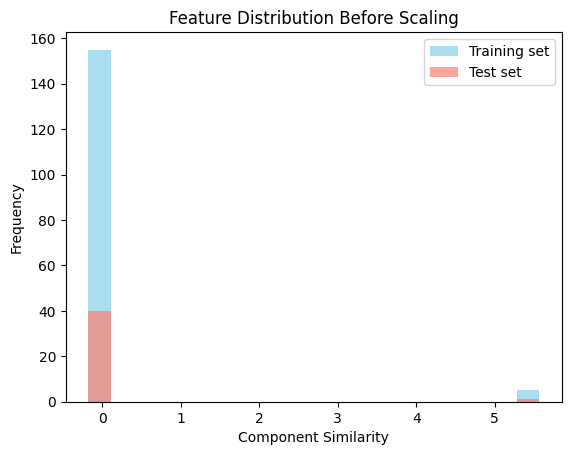

In [36]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Training set scaled:\n{X_train_scaled}")
print(f"Test set scaled:\n{X_test_scaled}")
print(f"Training set scaled shape: {X_train_scaled.shape}")
print(f"Test set scaled shape: {X_test_scaled.shape}")
print(f"Training set scaled mean: {X_train_scaled.mean(axis=0)}")
print(f"Training set scaled std: {X_train_scaled.std(axis=0)}")
plt.hist(X_train_scaled[:, 0], bins=20, color="skyblue", alpha=0.7, label="Training set")
plt.hist(X_test_scaled[:, 0], bins=20, color="salmon", alpha=0.7, label="Test set")
plt.legend()
plt.xlabel("Component Similarity") # Update with the feature name
plt.ylabel("Frequency")
plt.title("Feature Distribution Before Scaling")


### 5. Implement Staged Logistic Regression

The Staged Logistic Regression approach involves sequentially training logistic regression models. These are the steps:



**Step 1: Train the Logistic Regression Model**
I utilised `sklearn.linear_model.LogisticRegression`

In [38]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_model.fit(X_train_scaled, y_train)
# print(logistic_model.coef_)
# print(logistic_model.intercept_)
# print(logistic_model.coef_.shape)
logistic_model.coef_ = logistic_model.coef_ / logistic_model.coef_.max()
logistic_model.intercept_ = logistic_model.intercept_ / logistic_model.coef_.max()
print(logistic_model.coef_)

[[-0.01469944 -0.01094661 -0.01620365 -0.02132341 -0.01998703 -0.01620365
  -0.01424839 -0.01424839 -0.01620365 -0.00818796 -0.01620365 -0.01629678
   0.2704608  -0.02132341  0.27484404 -0.14566842 -0.09174447 -0.09174447
  -0.07326141 -0.01471174 -0.03389827 -0.02616274 -0.01199822 -0.01645734
  -0.03281784 -0.03281784 -0.02132341 -0.01160655 -0.02302606 -0.02132341
  -0.02132341 -0.00774343 -0.02860195 -0.01424839 -0.01827976 -0.02616274
  -0.01424839  0.16177195  0.17047223 -0.11709751 -0.01437387 -0.01172076
  -0.01097684 -0.00822039 -0.00818796 -0.01430476 -0.01171629 -0.01629833
  -0.01430476 -0.01424839 -0.01804397 -0.01094661 -0.0062799  -0.01160655
  -0.01804397 -0.01424839 -0.04923469 -0.01160035 -0.13100394 -0.01199822
  -0.07326141 -0.04331232 -0.01471174 -0.02576538  0.11914596 -0.02173475
   0.08975073  0.12808659 -0.06352813  0.11914596 -0.03869111 -0.10225568
  -0.03304074 -0.01629833  0.03695818 -0.01998703 -0.01199822  0.37144421
  -0.0253063  -0.01171629 -0.07326141 

**Step 2: Evaluate the Model**
Assess model performance using metrics like accuracy, precision, recall, and F1-score.

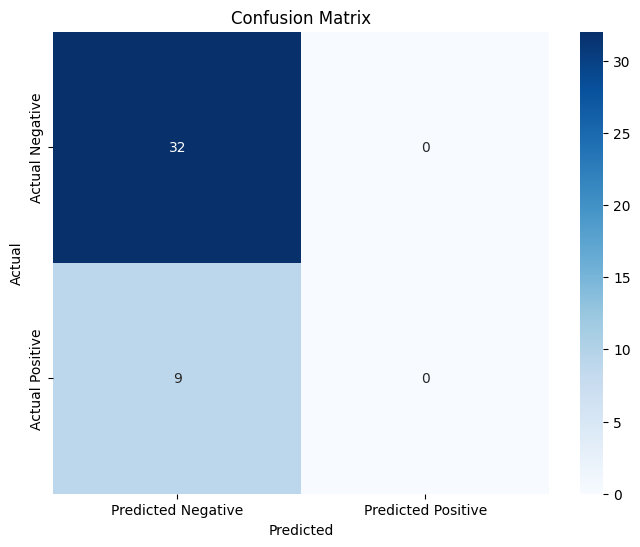

Accuracy: 0.7804878048780488


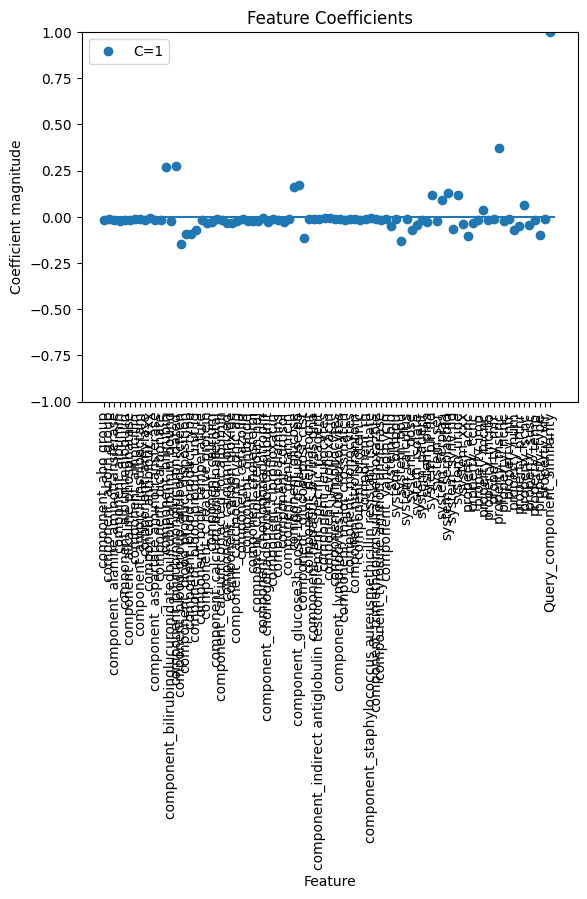

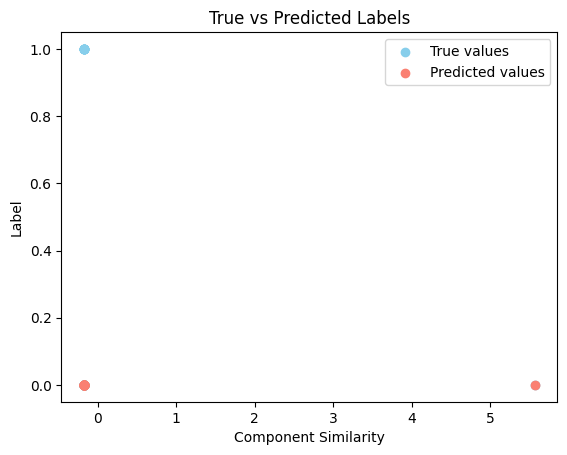

,precision,recall,f1-score,support
0,0.780488,1.000000,0.876712,32.000000
1,0.000000,0.000000,0.000000,9.000000
accuracy,0.780488,0.780488,0.780488,0.780488
macro avg,0.390244,0.500000,0.438356,41.000000
weighted avg,0.609161,0.780488,0.684263,41.000000


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on the test set
y_pred = logistic_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)


print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
# print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
plt.plot(logistic_model.coef_.T, "o", label="C=1")
plt.xticks(range(X_train_scaled.shape[1]), X.columns, rotation=90)
plt.hlines(0, 0, X_train_scaled.shape[1])
plt.ylim(-1, 1)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.title("Feature Coefficients")
plt.show()
plt.scatter(X_test_scaled[:, 0], y_test, color="skyblue", label="True values")
plt.scatter(X_test_scaled[:, 0], y_pred, color="salmon", label="Predicted values")
plt.legend()
plt.xlabel("Component Similarity")
plt.ylabel("Label")
plt.title("True vs Predicted Labels")
plt.show()
# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)





# zero_division=0: This will set the precision and F-score to 0 for labels with no predicted samples, which is a common choice.
# zero_division=1: This will set the precision and F-score to 1 for labels with no predicted samples.
# Choose the value for zero_division that best fits your needs. In most cases, setting it to 0 is appropriate, as it reflects the fact that the model did not predict any instances of those classes.

,precision,recall,f1-score,support
0,0.780488,1.000000,0.876712,32.000000
1,0.000000,0.000000,0.000000,9.000000
accuracy,0.780488,0.780488,0.780488,0.780488
macro avg,0.390244,0.500000,0.438356,41.000000
weighted avg,0.609161,0.780488,0.684263,41.000000


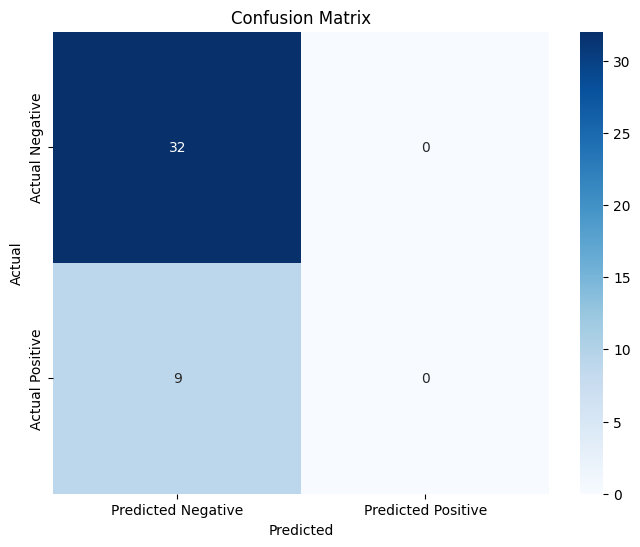

In [ ]:
# Convert classification report to DataFrame
report_df = pd.DataFrame(report).transpose()

# Display classification report as HTML table
display(HTML(report_df.to_html()))
#output the report_df to a image

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
import joblib

# Save the logistic model
joblib.dump(logistic_model, "logistic_model.pkl")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved!")


Model and scaler saved!


In [16]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(logistic_model, X_train_scaled, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())


Cross-validation scores: [1.     1.     1.     1.     0.9375]
Mean CV score: 0.9875


In [17]:
# Load model and scaler
import joblib
import pandas as pd

# Load model and scaler
loaded_model = joblib.load("logistic_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

# Define new data
new_data = pd.DataFrame({
	"component": ["glucose"],
	"system": ["blood"],
	"property": ["SCnc"],
	"Query_component_Similarity": [0.8]  # Example similarity score
})

# One-hot encode new data
new_data_encoded = pd.get_dummies(new_data, prefix=["component", "system", "property"])

# Align new data with the training data columns
missing_cols = set(final_features.columns) - set(new_data_encoded.columns)
for col in missing_cols:
	new_data_encoded[col] = 0
new_data_encoded = new_data_encoded[final_features.columns]

# Scale new data
new_data_scaled = loaded_scaler.transform(new_data_encoded)

# Predict
new_predictions = loaded_model.predict(new_data_scaled)
print("Predictions:", new_predictions)


Predictions: [0]
